# Assignment 1

## Hariharan Kalimuthu
## 2020115015


# Task 1

In [1]:
#import the first sheet of Assignment1_data.xlsx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore all warnings
import warnings
warnings.filterwarnings('ignore')


#importing the first sheet.
df = pd.read_excel('Assignment1_data.xlsx', sheet_name = 0)

Now, in order to find out which sort of a visualisation technique is misleading, we first plot hostograms of each column and find its mean, median and mode to gain an idea of the dataset.

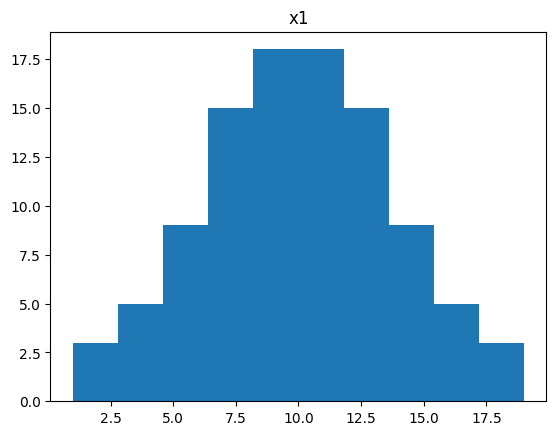

Mean:  10.0
Median:  9.999999999999979
Mode:  0      1.000000
1      2.022197
2      2.681359
3      3.180360
4      3.587617
        ...    
95    16.412383
96    16.819640
97    17.318641
98    17.977803
99    19.000000
Name: x1, Length: 100, dtype: float64


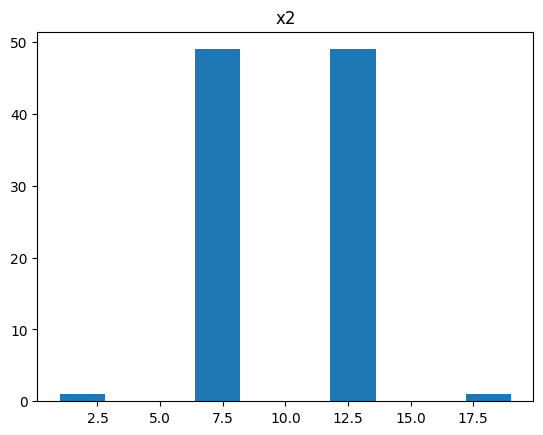

Mean:  9.999999999999998
Median:  10.00000000000001
Mode:  0      1.000000
1      7.103307
2      7.161498
3      7.192361
4      7.214504
        ...    
95    12.785496
96    12.807639
97    12.838502
98    12.896693
99    19.000000
Name: x2, Length: 100, dtype: float64


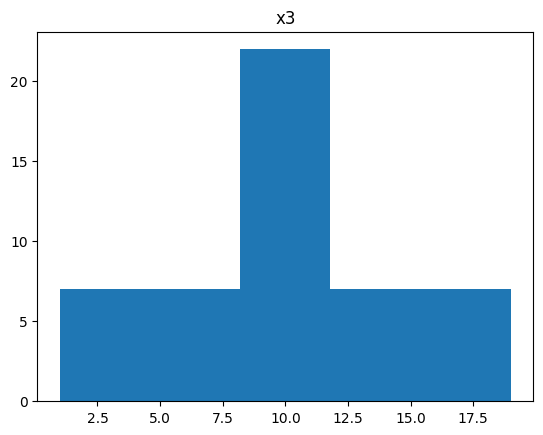

Mean:  10.000000000000002
Median:  10.0
Mode:  0     9.5
1    10.5
Name: x3, dtype: float64


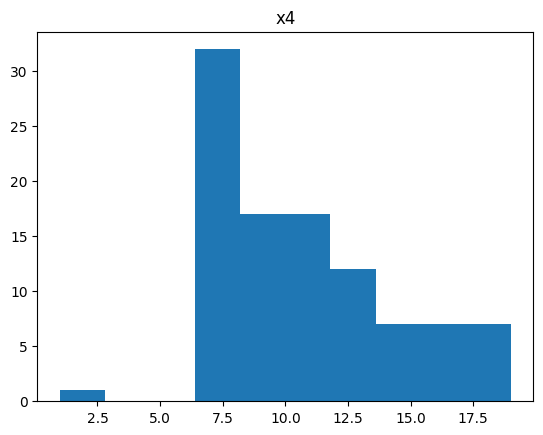

Mean:  10.736380317548308
Median:  9.999999999999986
Mode:  0    7.403307
Name: x4, dtype: float64


In [2]:


# make a histogram of the data for each column, find mean, median and mode for each column

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    print('Mean: ', df[col].mean())
    print('Median: ', df[col].median())
    print('Mode: ', df[col].mode())

We observe that even though the mean and median of each column is the same, the distribution varies across each column. Hence, a visualisation like boxplot might depict each distribution is the same, hiding the differences between them. Given below is the code to make boxplots of each column.

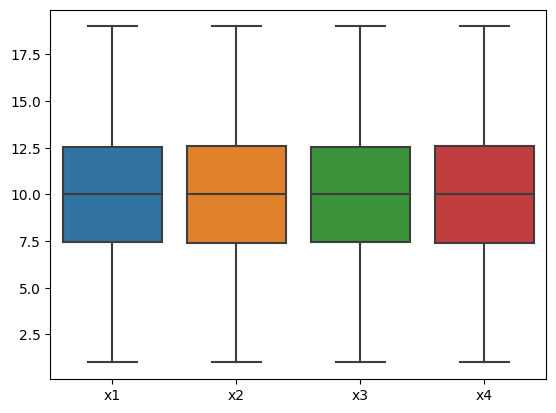

In [3]:
# make a boxplot of the data for each column, in the same plot

sns.boxplot(data = df)
plt.show()


As we anticipated, the boxplots fail to convey the differences in the distribution of datapoints for each column. Hence, visualisation techniques such as violin plots or histograms would do a much better job of helping us understand the data better.

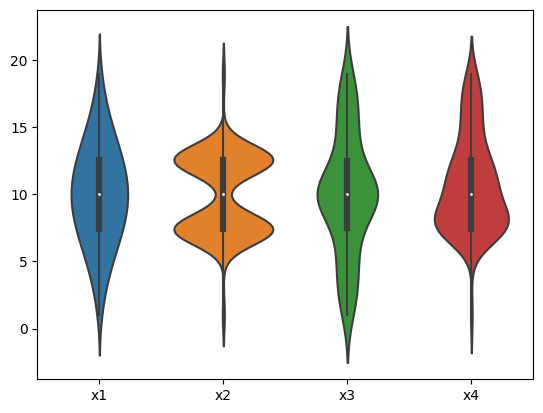

In [4]:
# make a violin plot of the data for each column, in the same plot

sns.violinplot(data = df)
plt.show()


# Task 2

In order to gain insights on this data, choosing the correct method of visualising the data is important. We need to get an idea of how each joint movement contributes to each aspect of personality trait. Hence, we first go with the how much each join movement affects the overall personality score and the distribution of the category of personality trait each joint affects. A stacked bar chart seems to be a good visualisation technique for this task. 

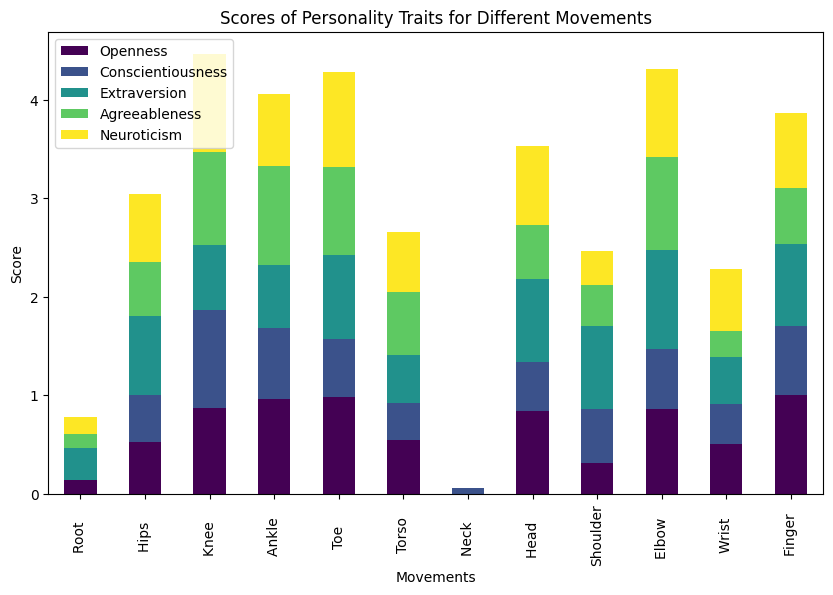

In [5]:
#import the second sheet of Assignment1_data.xlsx

df2 = pd.read_excel('Assignment1_data.xlsx', sheet_name = 1)

# with x labels as the row names(in column 0) and y labels as the column names(in row 0)
df2.set_index('Movements', inplace=True)

# Create a bar graph
ax = df2.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

# Set labels and title
ax.set_xlabel("Movements")
ax.set_ylabel("Score")
ax.set_title("Scores of Personality Traits for Different Movements")

# Show the plot
plt.show()


Hence, we can draw comparisions on how effective each joint is in contributing to personality scores and what aspect of personality score is influenced by each joint movement. 

Another useful way to gain insights is to make a barchart of scores for each category and the corresponding scores of the joint movements for that partucular personality trait. 

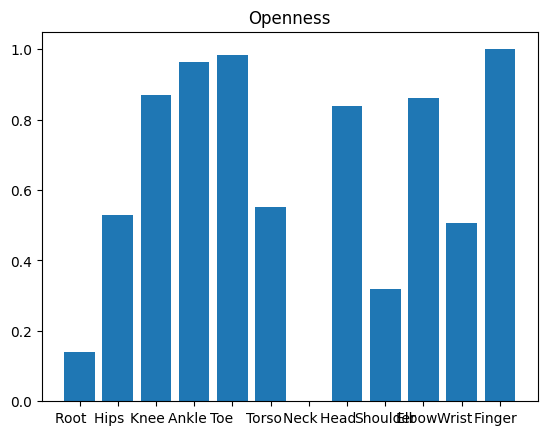

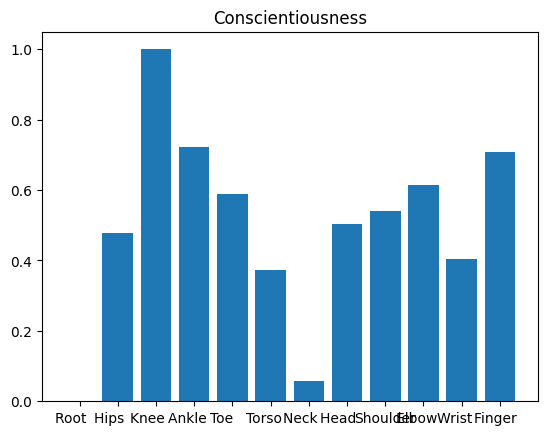

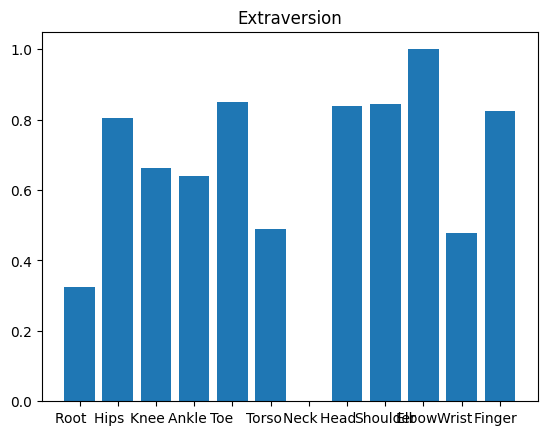

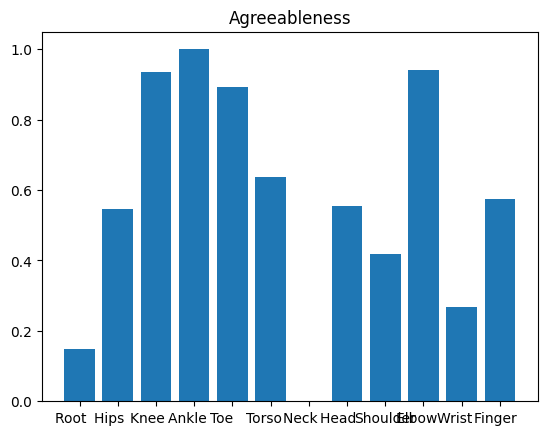

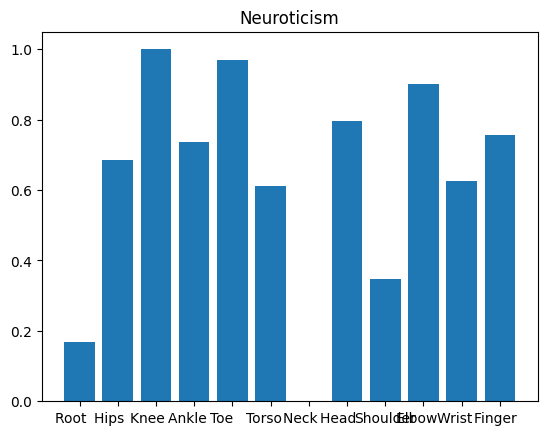

In [6]:
df2 = pd.read_excel('Assignment1_data.xlsx', sheet_name = 1)

for col in df2.columns:
    data = {}
    if(col == 'Movements'):
        continue
    for i in range(0, len(df2)):
        data[df2['Movements'][i]] = df2[col][i]
    plt.bar(data.keys(), data.values())
    plt.title(col)
    plt.show()

   

# Task 3

## Task 3.1

First we make the dataframe for the given task

In [7]:
# Data
data = {
    'Location': ['Safe Zone'] * 4 + ['Contaminated City'] * 4 + ['Rural Area'] * 4 + ['Isolated Island'] * 4,
    'Gender': ['Male', 'Male', 'Female', 'Female'] * 4,
    'Outcome': ['Turned into zombies', 'Survived'] * 8,
    'Count': [118, 62, 4, 141, 154, 25, 13, 93, 422, 88, 106, 90, 670, 192, 3, 20]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

             Location  Gender              Outcome  Count
0           Safe Zone    Male  Turned into zombies    118
1           Safe Zone    Male             Survived     62
2           Safe Zone  Female  Turned into zombies      4
3           Safe Zone  Female             Survived    141
4   Contaminated City    Male  Turned into zombies    154
5   Contaminated City    Male             Survived     25
6   Contaminated City  Female  Turned into zombies     13
7   Contaminated City  Female             Survived     93
8          Rural Area    Male  Turned into zombies    422
9          Rural Area    Male             Survived     88
10         Rural Area  Female  Turned into zombies    106
11         Rural Area  Female             Survived     90
12    Isolated Island    Male  Turned into zombies    670
13    Isolated Island    Male             Survived    192
14    Isolated Island  Female  Turned into zombies      3
15    Isolated Island  Female             Survived     20


Now in order to understand the survival chances at each location, we must make use of a visualisation technique to get and idea of how things look like for people in each region. I belive that a pie cahrt would be a good idea for getting an idea of the percentage of people who survived in each location. A bar graph to visualise the number of survivors/people who turned into zombies might also be of use to us. 

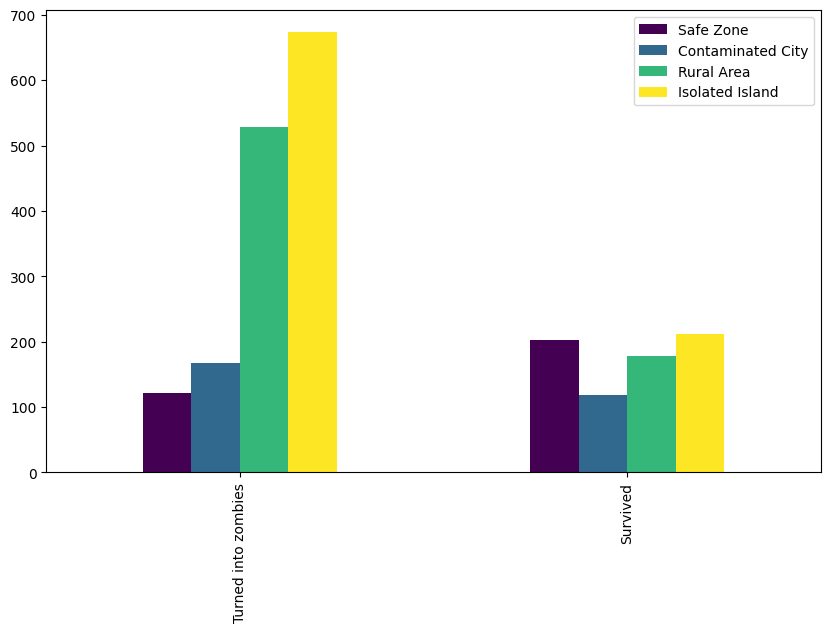

In [8]:
# for each location in the variable data, count the number of survivors and people who turned into zombies and store these counts in a dictionary

# Create a dictionary
survived = {}
zombie = {}


# Iterate over the rows of the DataFrame
for lab, row in df.iterrows() :
    # If 'outcome' is 'turned into zombies' add 1 to 'outcome_counts' for that location
    if row['Outcome'] == 'Turned into zombies' :
        zombie[row['Location']] = zombie.get(row['Location'], 0) + row['Count']
    # Else add 1 to 'outcome_counts' for that location
    else :
        survived[row['Location']] = survived.get(row['Location'], 0) + row['Count']

# now using both dictionaries, create a bar graph with x labels as the locations and y labels as the number of people who turned into zombies and the number of survivors

# Create a list of the column names for the bar plot
cols = ['Turned into zombies', 'Survived']

# Create a bar plot of the 'outcome_counts' using the list of column names

df2 = pd.DataFrame([zombie, survived], index=cols)
df2.plot(kind="bar", colormap="viridis", figsize=(10, 6))
plt.show()


                     Safe Zone  Contaminated City  Rural Area  Isolated Island
Turned into zombies        122                167         528              673
Survived                   203                118         178              212


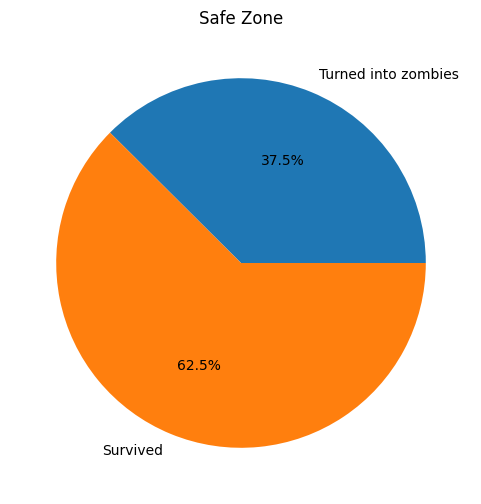

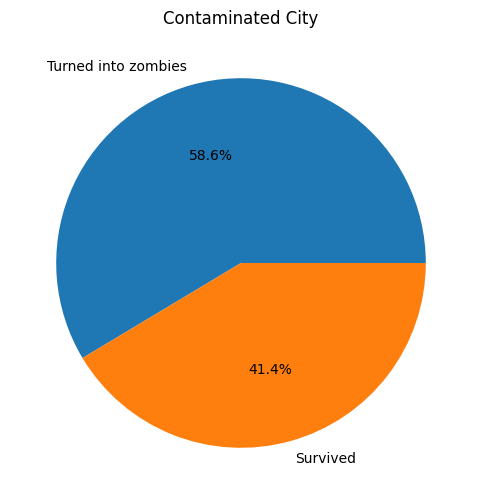

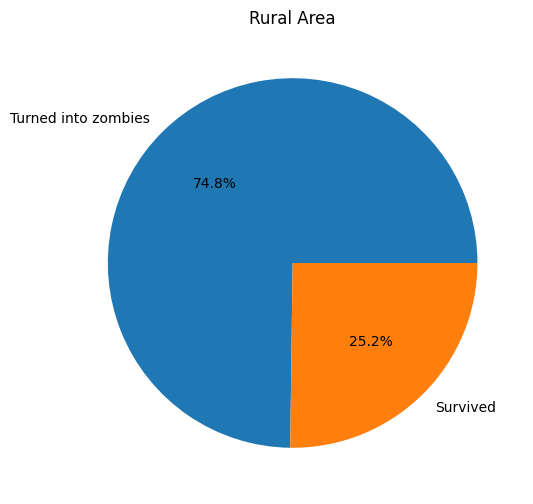

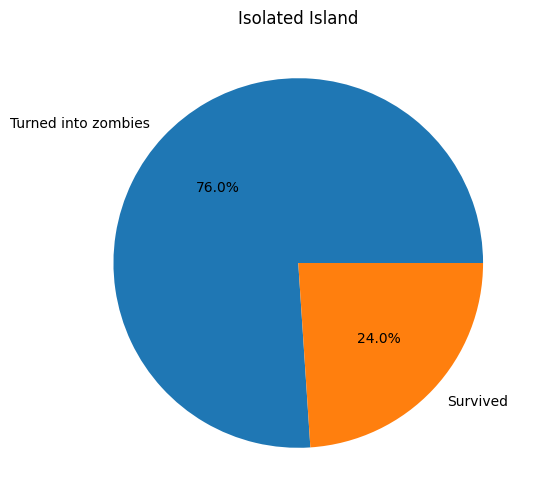

In [9]:
print(df2)

for col in df2.columns:
    plt.pie(df2[col], labels=df2.index, autopct='%1.1f%%')
    plt.gcf().set_size_inches(6, 6)
    plt.title(col)
    plt.show()


Hence the above statistics tell us that if we disregard gender, the safe zones seem to be the safest places to be in as the percentage of people who survived in them seem to be the highest. We can also conduct an analysis based off the gender of the poeple and determine which might be the safest/most dangerous places depending on the gender of the person if necessary. 

## Task 3.2

We first extract the two rows of interest to us. Then we can maybe have scatterplots in order to better understand the relationship between the type of glass and the corresponding refractive index (if there exists any)


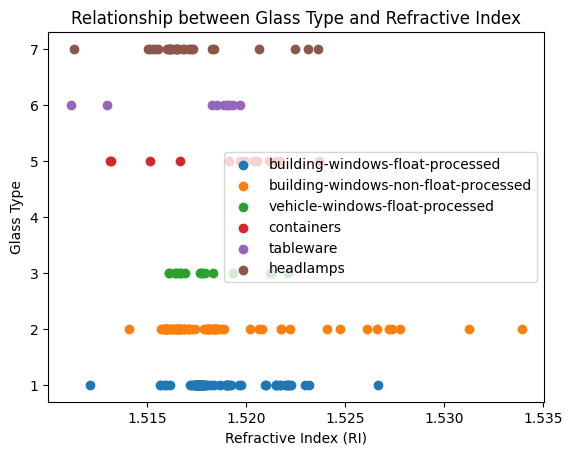

In [10]:
# import the third sheet of Assignment1_data.xlsx

df3 = pd.read_excel('Assignment1_data.xlsx', sheet_name = 2)

# retain only the colums 'RI' and 'Type' and drop all the others

df3 = df3[['RI', 'Type']]


type_mapping = {
    1: 'building-windows-float-processed',
    2: 'building-windows-non-float-processed',
    3: 'vehicle-windows-float-processed',
    4: 'vehicle-windows-non-float-processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

# Add a new column 'Type_Name' based on the mapping
df3['Type_Name'] = df3['Type'].map(type_mapping)

# Plotting scatter plots for each Glass Type
for type_val in df3['Type'].unique():
    type_data = df3[df3['Type'] == type_val]
    plt.scatter(type_data['RI'], type_data['Type'], label=f'{type_data["Type_Name"].iloc[0]}')

plt.xlabel('Refractive Index (RI)')
plt.ylabel('Glass Type')
plt.title('Relationship between Glass Type and Refractive Index')
plt.legend()
plt.show()
    



Hence, from the plot above, we can infer that to some extent the refractive indexes of the objects seem to be clustered around a particular value and hence, there might be a correlation between them.

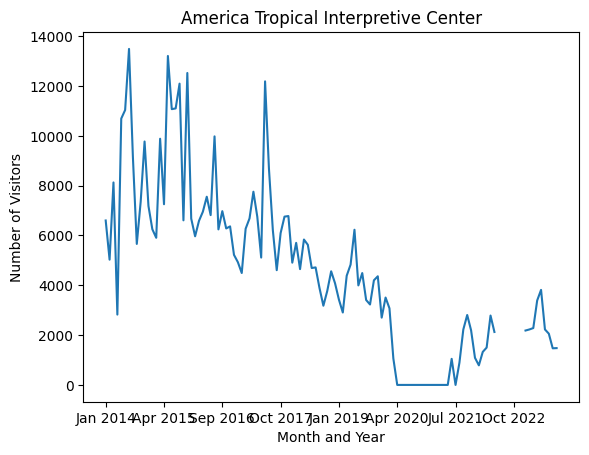

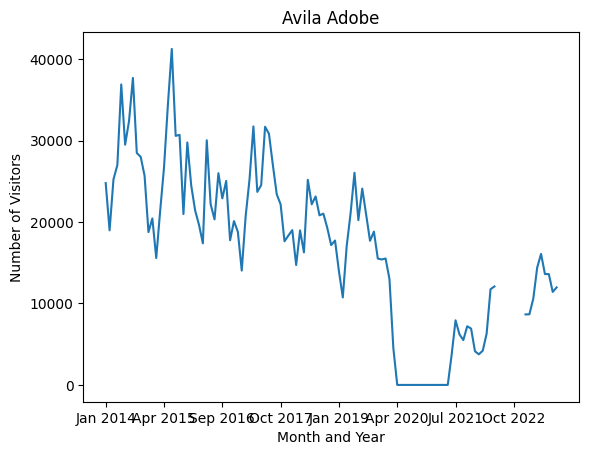

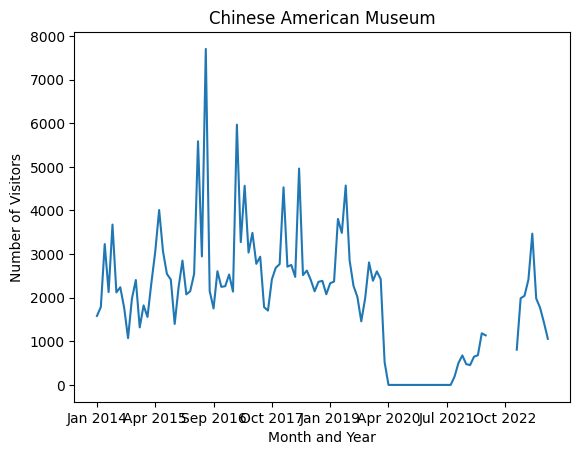

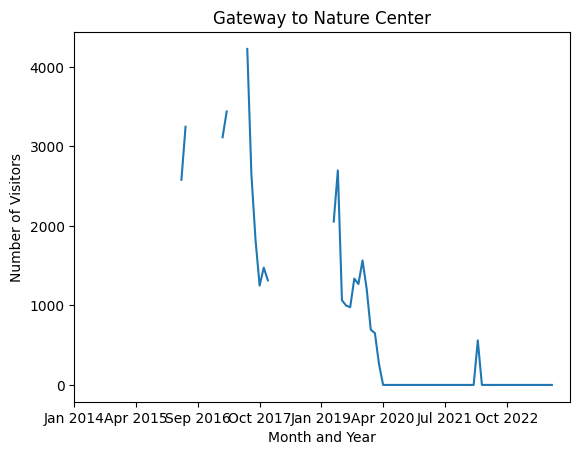

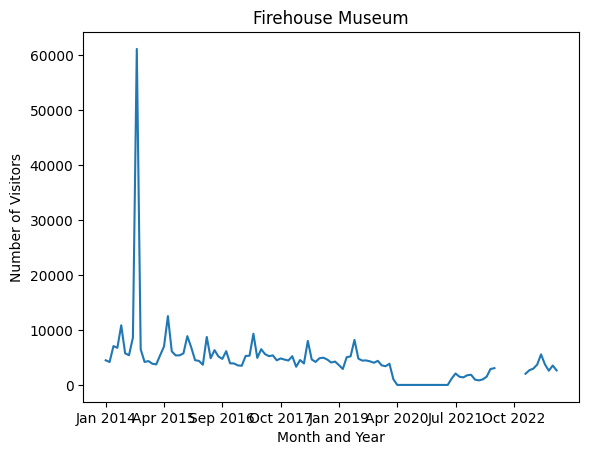

In [11]:
# import the fourth sheet of Assignment1_data.xlsx

df4 = pd.read_excel('Assignment1_data.xlsx', sheet_name = 3)

# now plot the number of visiters per month for each museum in a bar graph, different plot for each musium

for col in df4.columns:
    if(col == 'Month'):
        continue
    data = {}
    for i in range(0, len(df4)):
        data[df4['Month'][i]] = df4[col][i]
    # make a line graph
    plt.plot(data.keys(), data.values())
    # plot only every 15th label
    plt.xticks(list(data.keys())[::15])
    plt.xlabel('Month and Year')
    plt.ylabel('Number of Visitors')
    plt.title(col)
    plt.show()





The line graph makes sense to be plotted in order to visualise such kind of data as we can consider the time in months as a continuos entity given the numbe of data points. This visualisation tells us how many visiters visited each musem over the span of 8 years. We can gain very interesting insights from these graphs. For e.g. We can see that there was a huge dip during the covid times as the museums might have remain shut or people avoided the venture to musems altogether. Other interesting trends such as sudden peaks in the visitors in certain museums can give us a sense of the real world events that might have influeced the particular rise in visits. These graphs can also be used to compare and contrasts the interests in particular musuems across times. We can also try and identify interesting trends such whether there are peak months during a year when people prefer to visit musems and so on. 

Hence, examples of some preliminary conclusions we can come to from the graphs above are:

1. Gateway to nature center is the least popular museum. (The graphs can be subjected to the same scales for a clearer comparison ).
2. There has been a decline in the number of people who visit museums over the years.
3. Some even had a huge negative impact on the number of visitors to the museum in the years from 2020-2022 (Which we know was the onset of the COVID-19 pandemic).

# Task 5

In [12]:

# import the fifth sheet of Assignment1_data.xlsx

df5 = pd.read_excel('Assignment1_data.xlsx', sheet_name=4, header=None)

df5.describe()


,0,1,2,3,4,5,6,7
count,262,262,262,262,262,262,262,262
unique,104,6,76,86,241,18,14,4
top,14,4,97,150,2130,16,1974,US.
freq,16,125,16,16,3,45,35,162


In [13]:
# in the last column of df5, 'brand' assign a unique integer to each brand

df5.iloc[1:, 7] = df5.iloc[1:, 7].astype('category').cat.codes

# if there is a missing entry in any of the rows of df5, drop that row

df5.replace(' ', np.nan, inplace=True)  # Replace empty strings with NaN
df5.dropna(inplace=True)  # Remove rows with NaN values




In [14]:
df5

,0,1,2,3,4,5,6,7
0,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
1,14,8,350,165,4209,12,1972,2
2,31.9,4,89,71,1925,14,1980,0
3,17,8,302,140,3449,11,1971,2
4,15,8,400,150,3761,10,1971,2
...,...,...,...,...,...,...,...,...
257,17,8,305,130,3840,15,1980,2
258,36.1,4,91,60,1800,16,1979,1
259,22,6,232,112,2835,15,1983,2
260,18,6,232,100,3288,16,1972,2


Now, we make two types of correlation matrices. One based on Pearson Correlation and the other on Spearman's Rank correlation. 

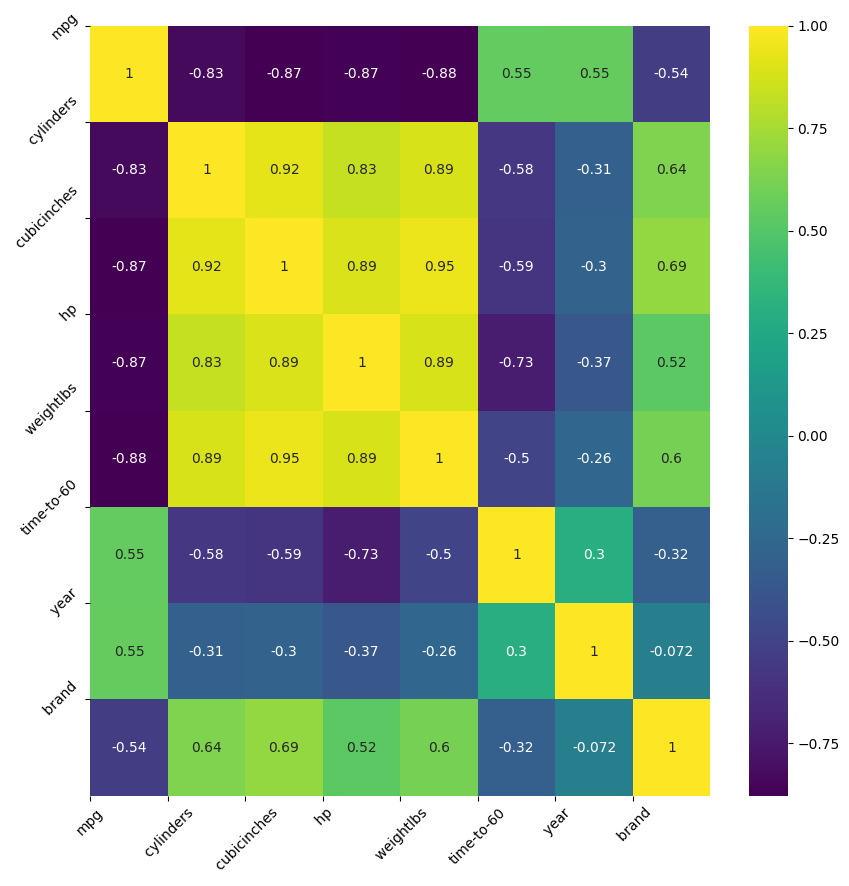

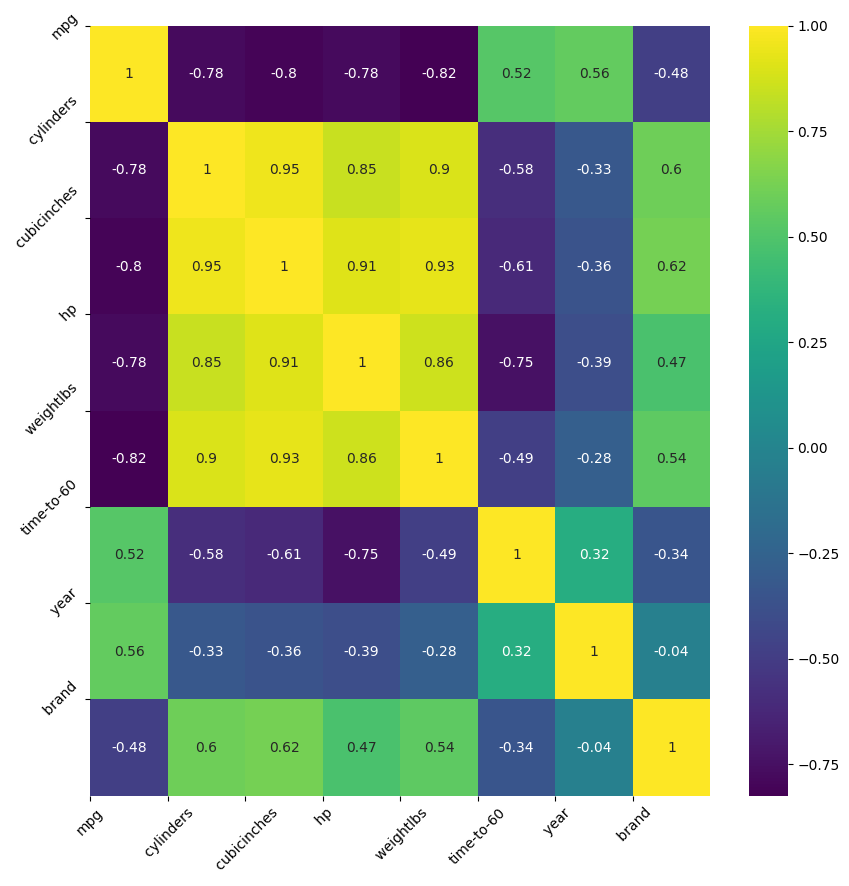

In [15]:
# draw a correlation matrix for the columns of df5, ignore the first row as it contains the column names. Make a heatmap of the correlation matrix

df5_numeric = df5.iloc[1:, :].astype(float)  # Exclude the first row and convert to numeric
corr = df5_numeric.corr(method='spearman')

#  make a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='viridis')

#  make a np.array which contains the titles of the columns names of df5, which is the second row of df5    
cols = np.array(df5.iloc[0, :])

plt.xticks([0, 1, 2, 3, 4,5,6,7],cols,rotation=45, ha='center')
plt.yticks([0, 1, 2, 3, 4,5,6,7],cols,rotation=45, va='center')
# plt.tick_params(axis='both', which='both', length=0)
# make the heatmap bigger
plt.gcf().set_size_inches(10, 10)
plt.show()

corr = df5_numeric.corr(method='pearson')

#  make a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='viridis')

#  make a np.array which contains the titles of the columns names of df5, which is the second row of df5    
cols = np.array(df5.iloc[0, :])

plt.xticks([0, 1, 2, 3, 4,5,6,7],cols,rotation=45, ha='center')
plt.yticks([0, 1, 2, 3, 4,5,6,7],cols,rotation=45, va='center')
# plt.tick_params(axis='both', which='both', length=0)
# make the heatmap bigger
plt.gcf().set_size_inches(10, 10)
plt.show()


From the correlation heatmap above, we can make many inferences. For example, we see that the engine displacement in cubic inches has a strong positive correlation with the number of cylinders. Similarly, the number of cylinders is also strongly positively correlated to the horsepower, as expected. 

The time to 60 is negatively correlated to a lot of factors such as cylinders, cc, horsepower as expected as well. This is because as the car is more powerful, the time to 60 would be lesser as it will accelerate faster. 

There are lots of such inferences we can draw from such heatmaps.

Now, we observe that both the methods of obtaining correlations give us pretty similar numbers for this dataset. However, these are generally the differences between the two correlation methods:

### Pearson Correlation:

- Assumption: Assumes a linear relationship between variables.

#### Strengths:
- Well-suited for linear relationships.
- Sensitive to outliers.
#### Weaknesses:
- Assumes normal distribution.
- May not capture non-linear relationships.

### Spearman Rank Correlation:

- Assumption: Doesn't assume a linear relationship and works well for monotonic relationships.
#### Strengths:
- Non-parametric, so no distribution assumption.
- Robust to outliers.
#### Weaknesses:
- Less powerful for detecting linear relationships.